In [1]:
from acfunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.stats as astat
from solartwins import *
import pickle
from IPython.display import Image, display, HTML
import starspot as ss
import starspot.rotation_tools as rt
from starspot import sigma_clipping
import lightkurve as lk
from lightkurve import search_targetpixelfile, search_lightcurvefile
import math
import exoplanet
import eleanor
from astropy.coordinates import SkyCoord

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

In [3]:
KIDs = list(m_dwarf_rotation_period[0])

In [68]:
import warnings
warnings.filterwarnings("ignore")

# Kepler ID 2164791

# kepler

In [4]:
kep_mq1 = search_targetpixelfile('KIC 2164791').download_all()
print('The McQuillan ACF is : ', m_dwarf_rotation_period[4][KIDs.index('2164791')])

The McQuillan ACF is :  3.351


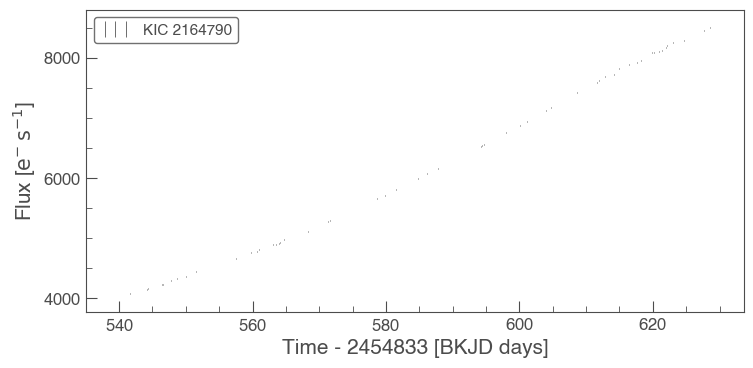

In [5]:
kepmq1 = kep_mq1[0].to_lightcurve(aperture_mask=kep_mq1[0].pipeline_mask).remove_outliers(sigma=6).bin(binsize=10)
kepmq1.errorbar()

In [6]:
figure_kep_mq1 = combining_quarters('2164791')
flux_kep_mq1 = figure_kep_mq1[0]
time_kep_mq1 = figure_kep_mq1[1]
flux_error_kep_mq1 = figure_kep_mq1[2]

Text(0, 0.5, 'Normalized Flux')

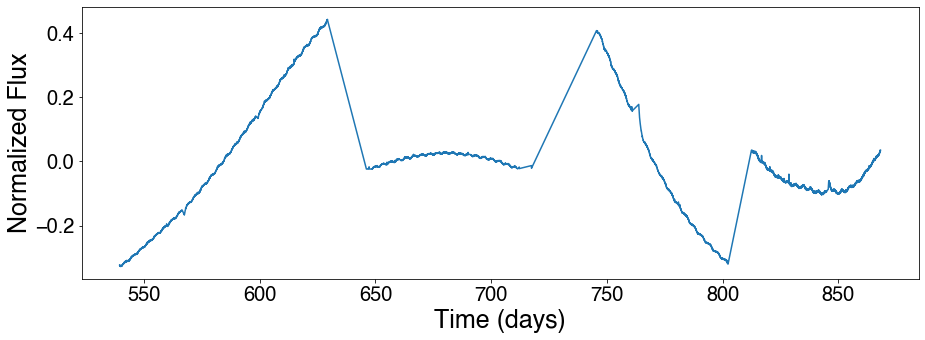

In [7]:
plt.figure(figsize=(15,5))
plt.plot(time_kep_mq1, flux_kep_mq1)
plt.xlabel('Time (days)')
plt.ylabel('Normalized Flux')

In [8]:
figure_kep_mq1_PDC = combining_PDC_quarters('2164791')
flux_kep_mq1_PDC = figure_kep_mq1_PDC[0]
time_kep_mq1_PDC = figure_kep_mq1_PDC[1]
flux_error_kep_mq1_PDC = figure_kep_mq1_PDC[2]

Text(0, 0.5, 'Normalized Flux')

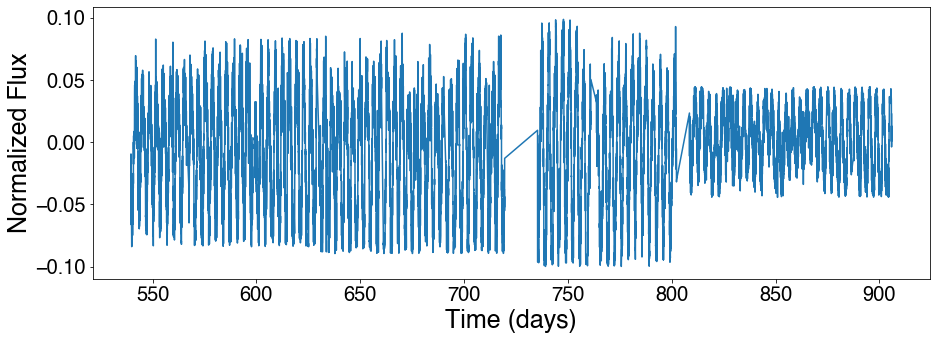

In [9]:
plt.figure(figsize=(15,5))
plt.plot(time_kep_mq1_PDC, flux_kep_mq1_PDC)
plt.xlabel('Time (days)')
plt.ylabel('Normalized Flux')

In [10]:
acf_kep_mq1= ac_mq_Q1_Q4_PDC('2164791', 1000);

Text(0.5, 1.0, 'Autocorrelated McQ1')

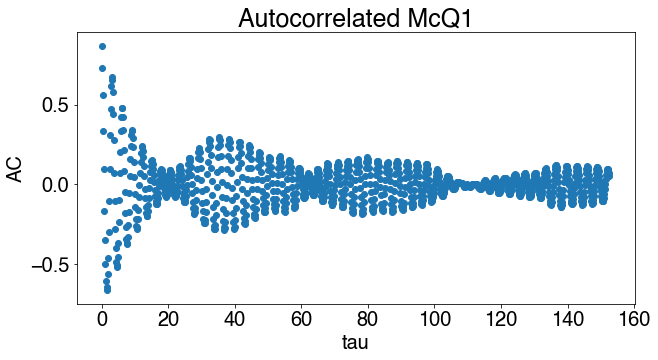

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(acf_kep_mq1[1], acf_kep_mq1[0])
plt.xlabel('tau', fontsize = 20)
plt.ylabel('AC', fontsize = 20)
plt.title('Autocorrelated McQ1', fontsize = 25)

In [12]:
rotate_fig5 = ss.RotationModel(time_kep_mq1_PDC, flux_kep_mq1_PDC, flux_error_kep_mq1_PDC)

3.3671737681071576


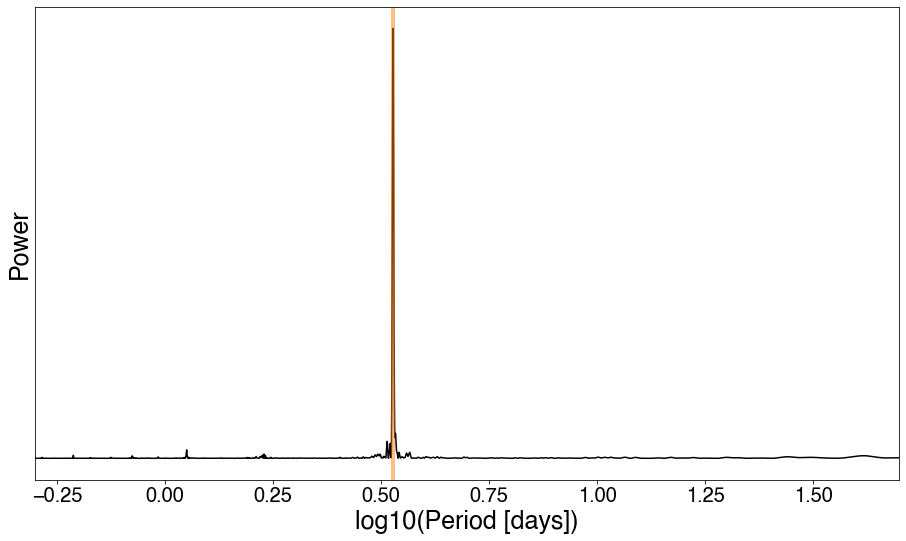

In [13]:
ls_period = rotate_fig5.ls_rotation()
print(ls_period)
rotate_fig5.ls_plot();

In [14]:
exo_0 = exoplanet.lomb_scargle_estimator(time_kep_mq1_PDC, flux_kep_mq1_PDC, yerr=flux_error_kep_mq1_PDC, max_period= 10, max_peaks=2)

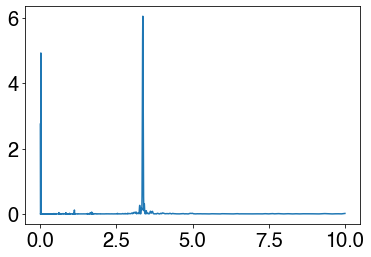

In [15]:
plt.plot(1/(exo_0['periodogram'][0]), exo_0['periodogram'][1])

In [16]:
period_grid_kep_mq1 = np.linspace(.1, 10, 1000)
pdm_period_kep_mq1, period_err_kep_mq1 = rotate_fig5.pdm_rotation(period_grid_kep_mq1, pdm_nbins=10)
print(pdm_period_kep_mq1, period_err_kep_mq1)

100%|██████████| 1000/1000 [00:14<00:00, 67.07it/s]

3.3702702702702707 -0.012127803833958525


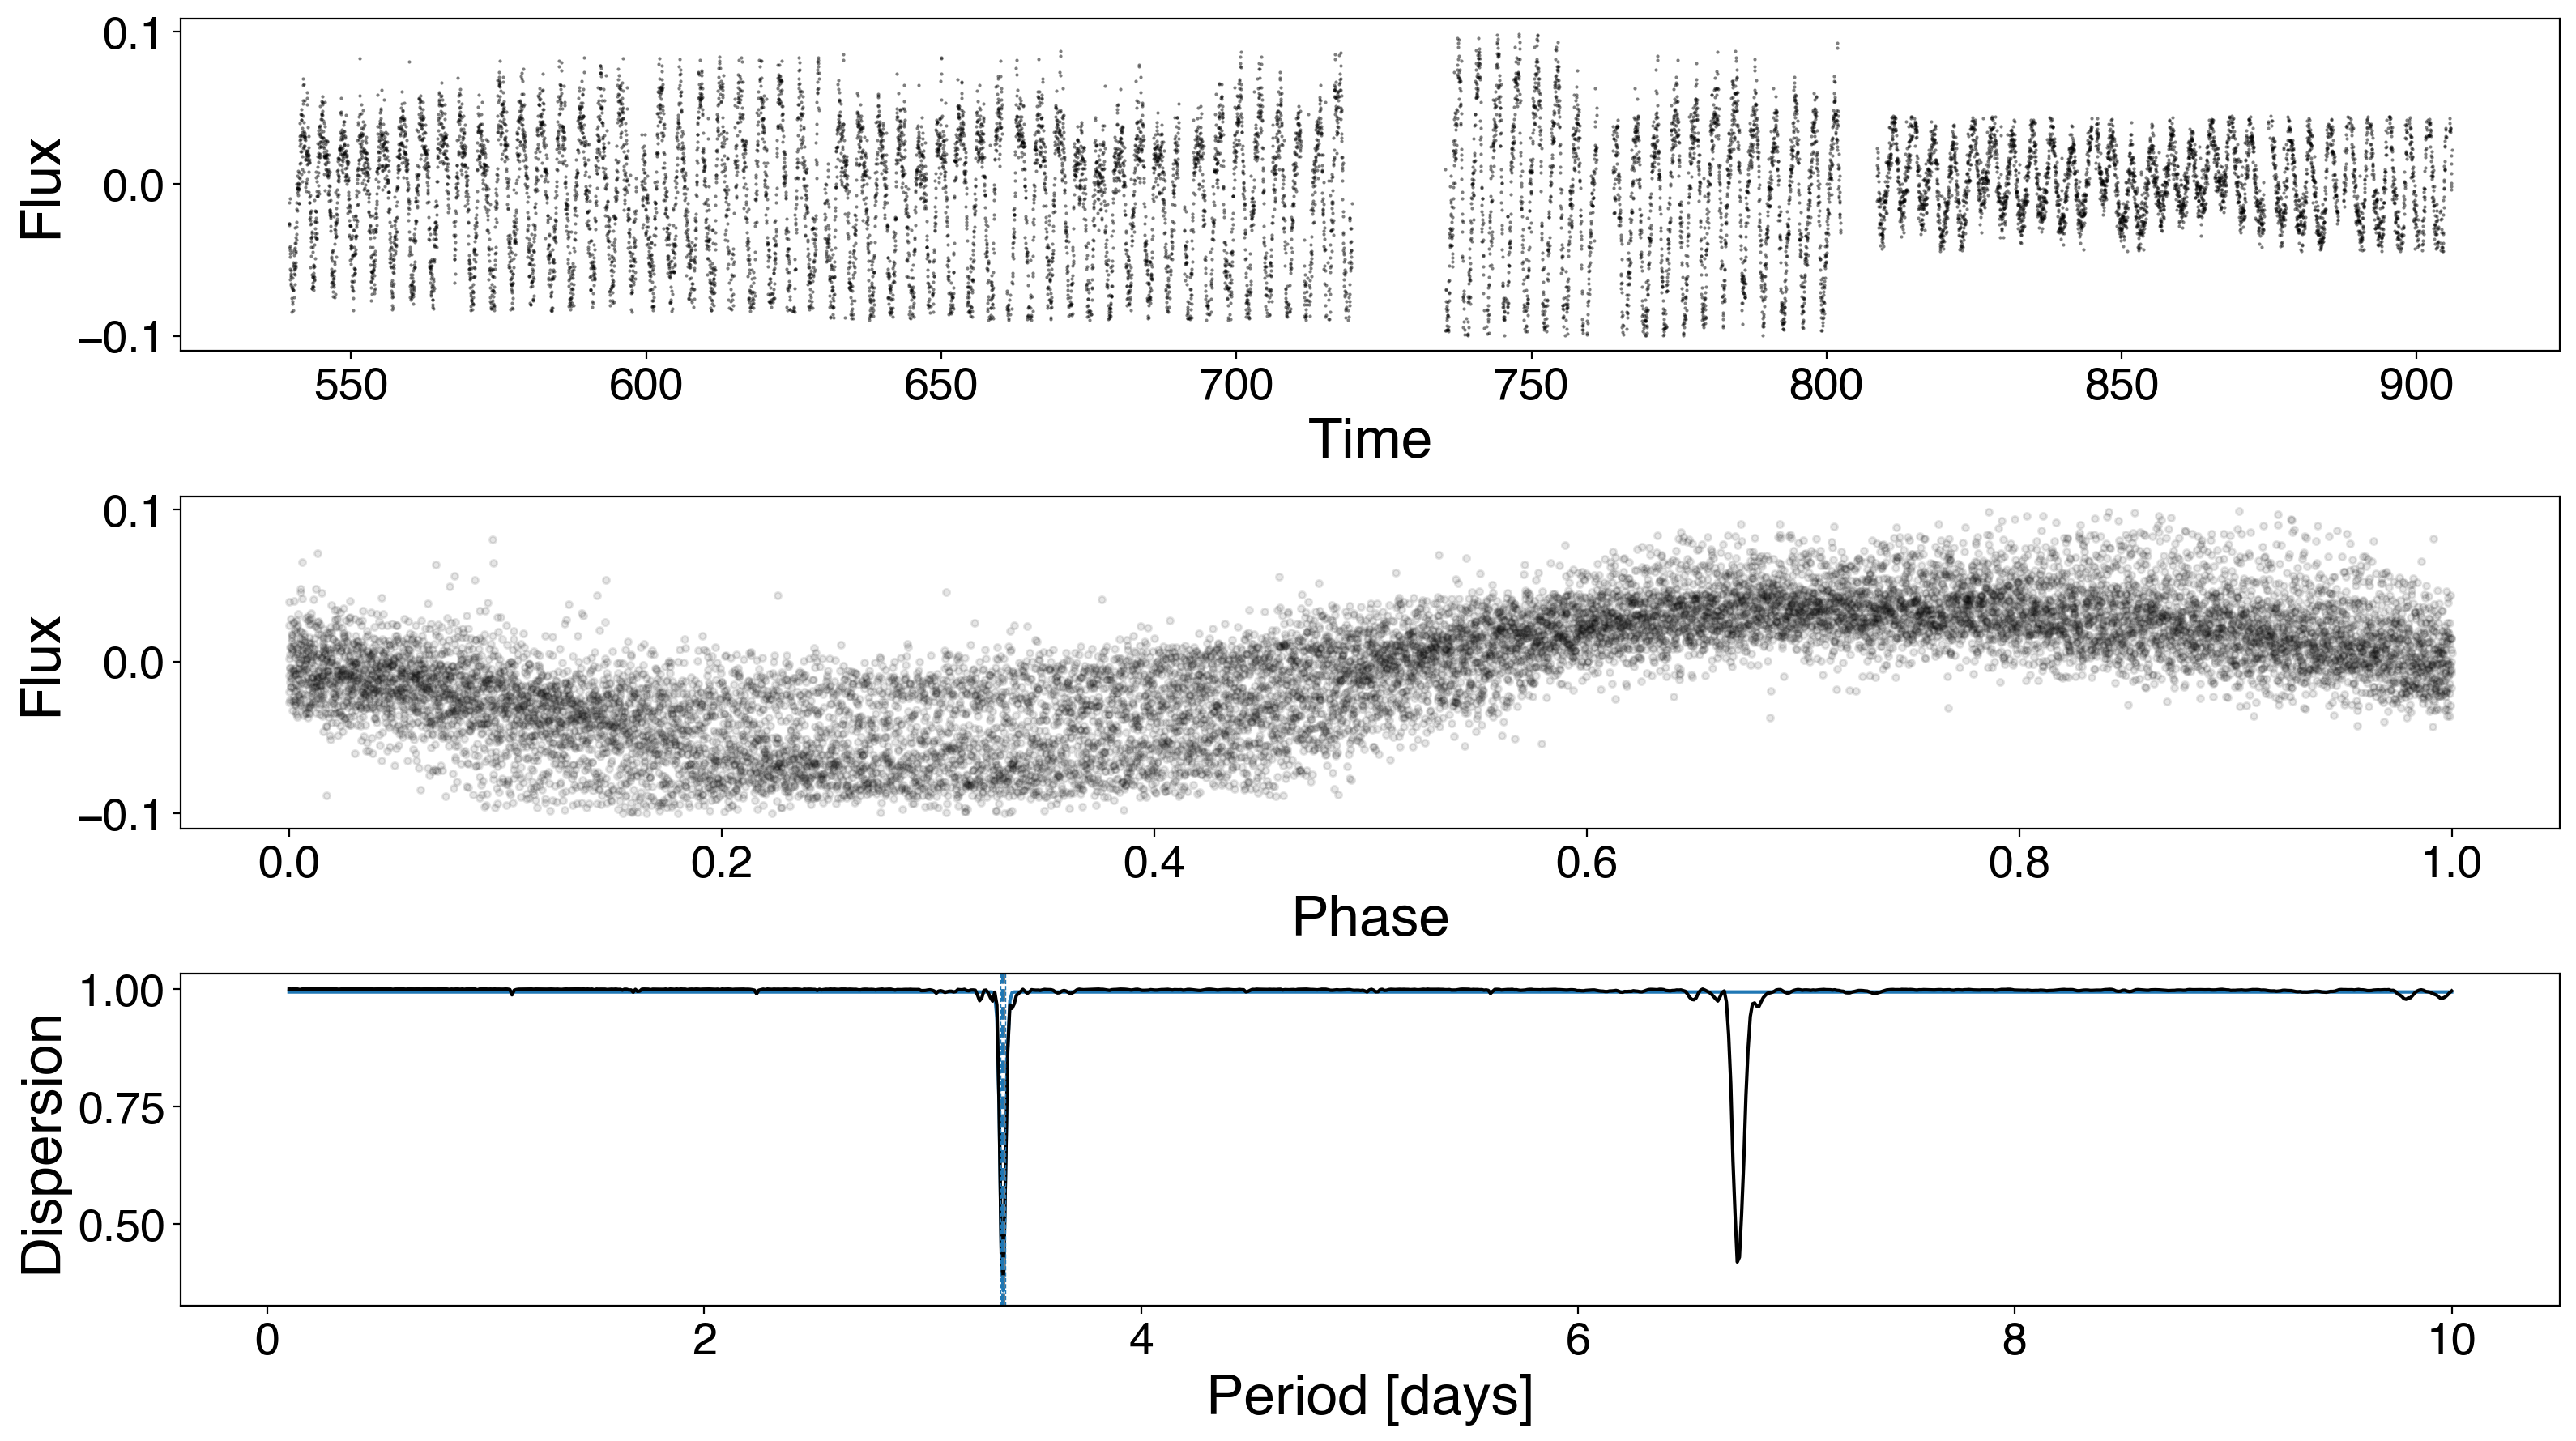

In [17]:
rotate_fig5.pdm_plot();

 #  tess

In [18]:
search_tess_mq1 = lk.search_targetpixelfile(target = "19:29:42.569+37:33:21.67", mission='TESS')
tess_mq1 = search_tess_mq1.download_all(quality_bitmask='default')
print(tess_mq1[0].targetid)

137637285


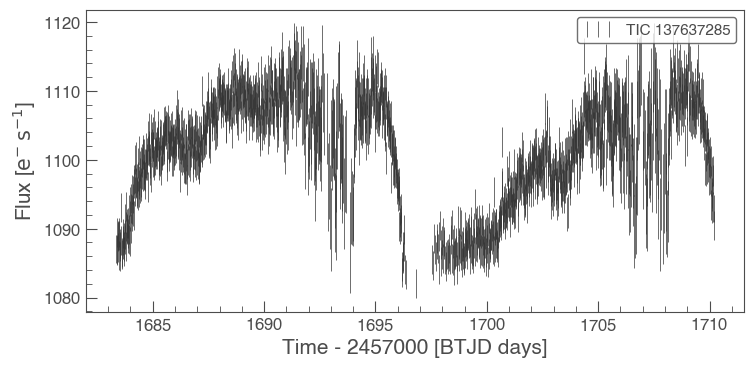

In [19]:
tess_mq1_tpf1 = tess_mq1[0].to_lightcurve(aperture_mask=tess_mq1[0].pipeline_mask).remove_outliers(sigma=2).bin(binsize=10)
tess_mq1_tpf1.errorbar()

In [20]:
acf_tess_mq1 = ac_mq_tess("19:29:42.569+37:33:21.67", 1000);

Text(0.5, 1.0, 'TESS Autocorrelated Figure McQ1')

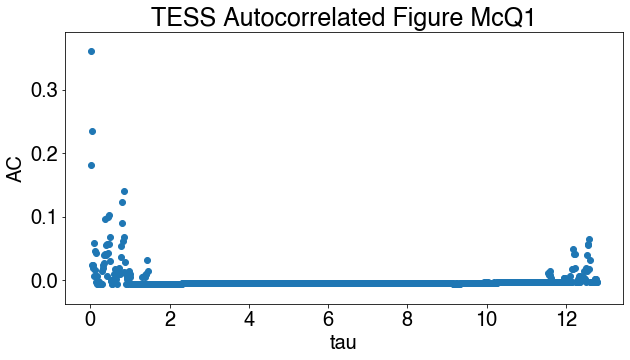

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(acf_tess_mq1[1], acf_tess_mq1[0])
plt.xlabel('tau', fontsize = 20)
plt.ylabel('AC', fontsize = 20)
plt.title('TESS Autocorrelated Figure McQ1', fontsize = 25)

In [22]:
tess_flux_mq1 = tess_mq1_tpf1.flux[0:] 
tess_time_mq1 = tess_mq1_tpf1.time[0:]
tess_flux_error_mq1 = tess_mq1_tpf1.flux_err[0:]

In [23]:
rotate_tess_mq1 = ss.RotationModel(tess_time_mq1, tess_flux_mq1, tess_flux_error_mq1)

17.72654754307594


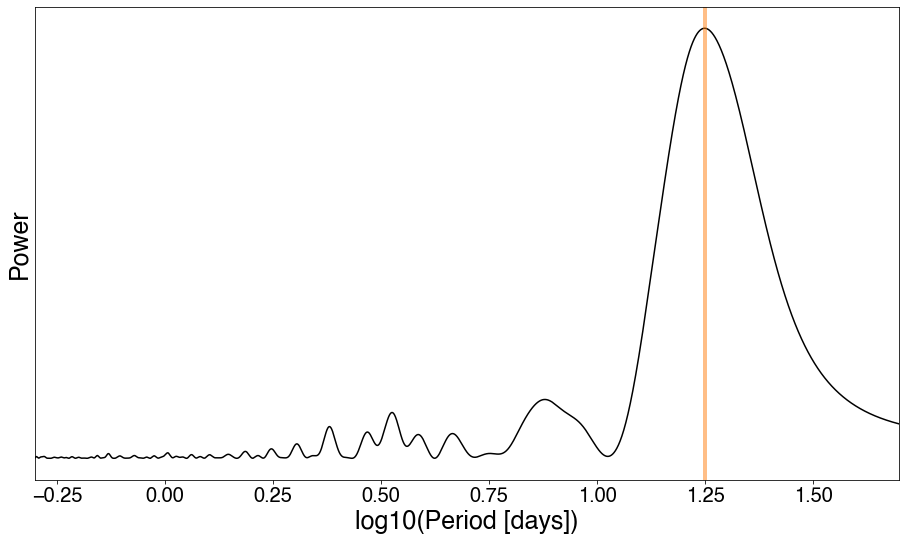

In [24]:
tess_period_mq1 = rotate_tess_mq1.ls_rotation()
print(tess_period_mq1)
rotate_tess_mq1.ls_plot();

In [25]:
exo_lomb = exoplanet.lomb_scargle_estimator(tess_time_mq1, tess_flux_mq1, yerr=tess_flux_error_mq1, max_period= 10, max_peaks=2)

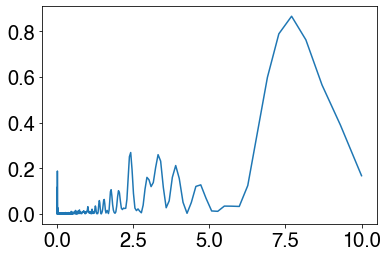

In [26]:
plt.plot(1/(exo_lomb['periodogram'][0]), exo_lomb['periodogram'][1])

In [27]:
period_grid_mq1_tess = np.linspace(.1, 10, 1000)
pdm_period_mq1_tess, period_err_mq1_tess = rotate_tess_mq1.pdm_rotation(period_grid_mq1_tess, pdm_nbins=10)
print(pdm_period_mq1_tess, period_err_mq1_tess)

100%|██████████| 1000/1000 [00:01<00:00, 727.53it/s]


7.215315315315316 1.6521143742146378


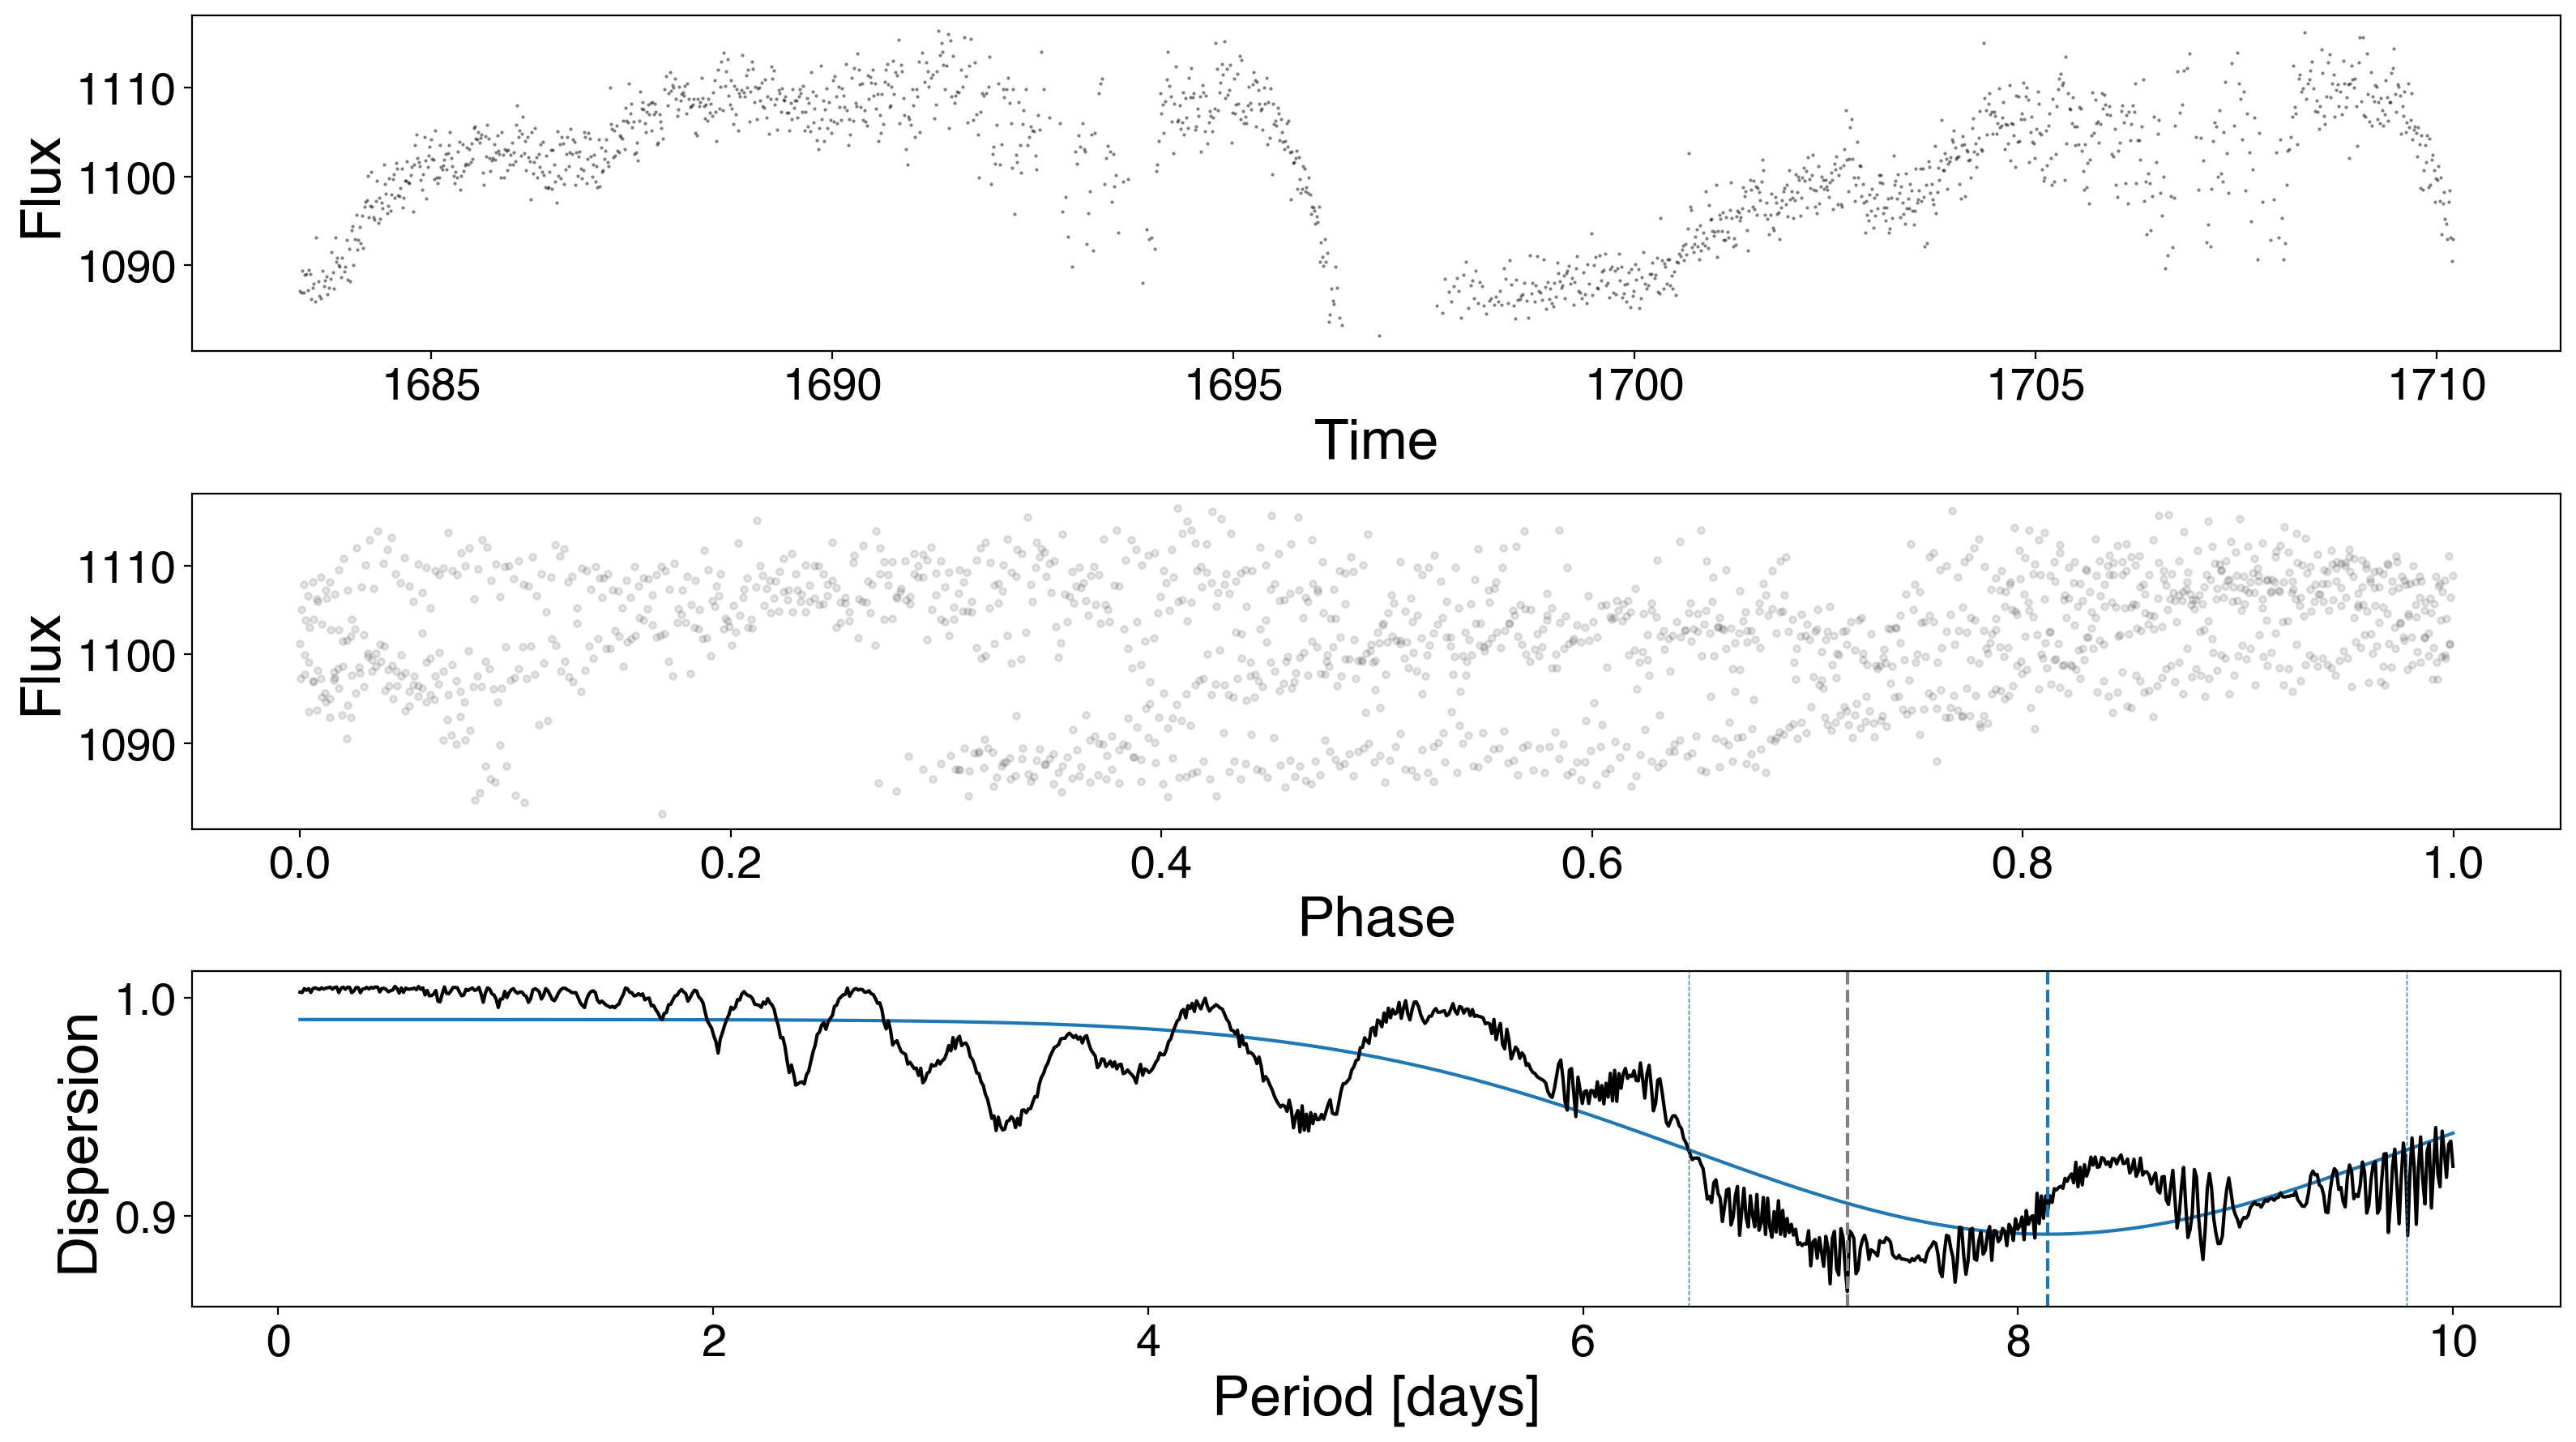

In [28]:
rotate_tess_mq1.pdm_plot();

In [29]:
m_dwarf_rotation_period[0:][0:20]

,0,1,2,3,4,5,6,7
0,KID,Teff,logg,Mass,Period,Period_Err,Amplitude,Flag\n
1,1162635,3899,4.62,0.5037,15.509,0.064,10.7,NF\n
2,1430893,3956,4.41,0.5260,17.144,0.046,10.4,NF\n
3,1572802,3990,4.48,0.5394,0.368,0.000,74.8,PB\n
4,1721911,3833,4.58,0.4781,28.403,0.394,3.9,NF\n
5,1866535,3878,4.50,0.4955,25.052,0.136,4.0,NF\n
6,1866986,3832,4.52,0.4777,35.585,0.516,6.5,NF\n
7,1870952,3947,4.69,0.5225,24.428,0.081,7.1,NF\n
8,1873543,3702,4.52,0.4282,11.351,0.051,14.0,NF\n
9,1996399,3802,4.49,0.4661,27.034,0.106,6.3,NF\n


# Kepler ID 7765762

In [30]:
print('The McQuillan ACF is : ', m_dwarf_rotation_period[4][KIDs.index('7765762')])

The McQuillan ACF is :  9.941


In [49]:
sr_tessffi = lk.search_tesscut('19 43 35.894 +43 27 32.69').download_all()
len(sr_tessffi)

#kepmq1 = sr_tessffi[0].to_lightcurve(aperture_mask=(sr_tessffi[0]).pipeline_mask).remove_outliers(sigma=6).bin(binsize=10)
#kepmq1.errorbar()

2

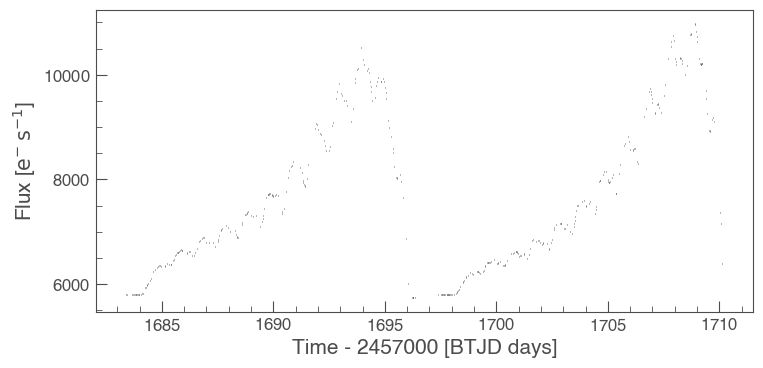

In [83]:
search_result = lk.search_tesscut('19 43 35.894 +43 27 32.69')
tpf_lc = search_result.download_all(quality_bitmask='default')
        
tpf_Q1 = tpf_lc[0].to_lightcurve(aperture_mask=None)
tpf_Q1.errorbar()

In [84]:
flux_nans_Q1 = tpf_Q1.flux[0:]
Q1_time = tpf_Q1.time[0:]
norm_flux_err_Q1 = tpf_Q1.flux_err[0:]

In [85]:
flux_nans_Q1

array([5810.7056, 5806.5767, 5803.7935, ..., 6172.045 , 5987.46  ,
       5856.48  ], dtype=float32)

In [69]:
from astropy import units as u
from astropy.coordinates import SkyCoord
c = SkyCoord('295.899 43.459', frame='icrs', unit='deg')

star = eleanor.Source(coords=c, sector = 15)
data = eleanor.TargetData(star, do_psf=True, do_pca=True)

No eleanor postcard has been made for your target (yet). Using TessCut instead.


100%|██████████| 1197/1197 [00:25<00:00, 46.23it/s]


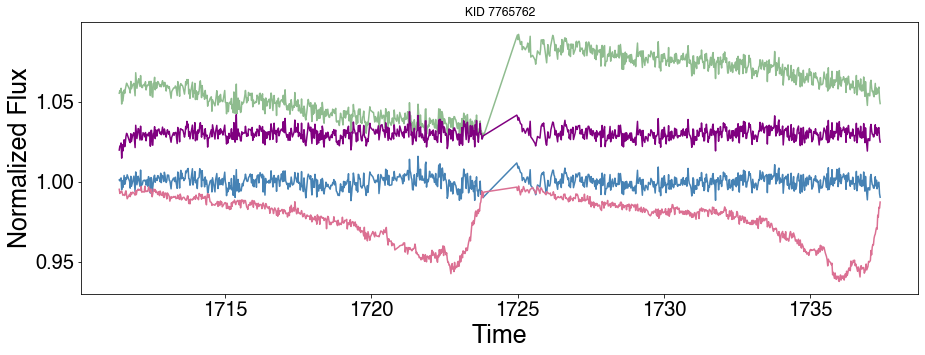

In [32]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, c = 'darkseagreen')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, c = 'purple')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), c = 'steelblue')
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, c= 'palevioletred')
plt.ylabel('Normalized Flux')
plt.xlabel('Time')
plt.title('KID 7765762');

In [58]:
flux = data.pca_flux[q]
time = data.time[q]
flux_bar = np.average(flux)

flux_err = flux * 0.01

In [59]:
eleanor_ac = ac_mq_tess_el(c, 1000)

No eleanor postcard has been made for your target (yet). Using TessCut instead.


Set MJD-OBS to 58710.877004 from DATE-OBS.
Set MJD-END to 58736.897529 from DATE-END'. [astropy.wcs.wcs]
100%|██████████| 1197/1197 [00:26<00:00, 45.31it/s]


Text(0.5, 1.0, 'Autocorrelated Eleanor 1')

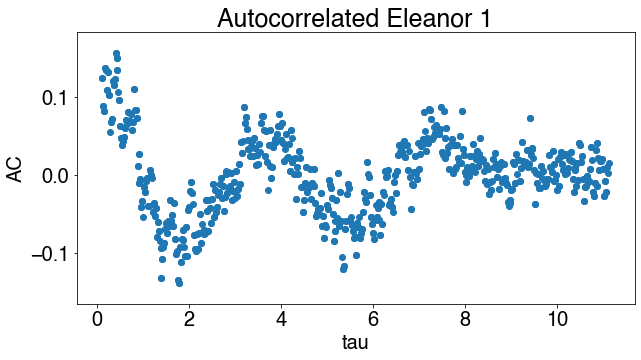

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(eleanor_ac[1], eleanor_ac[0])
plt.xlabel('tau', fontsize = 20)
plt.ylabel('AC', fontsize = 20)
plt.title('Autocorrelated Eleanor 1', fontsize = 25)

In [61]:
rotate_el = ss.RotationModel(time, flux, flux_err)

4.463862440239445


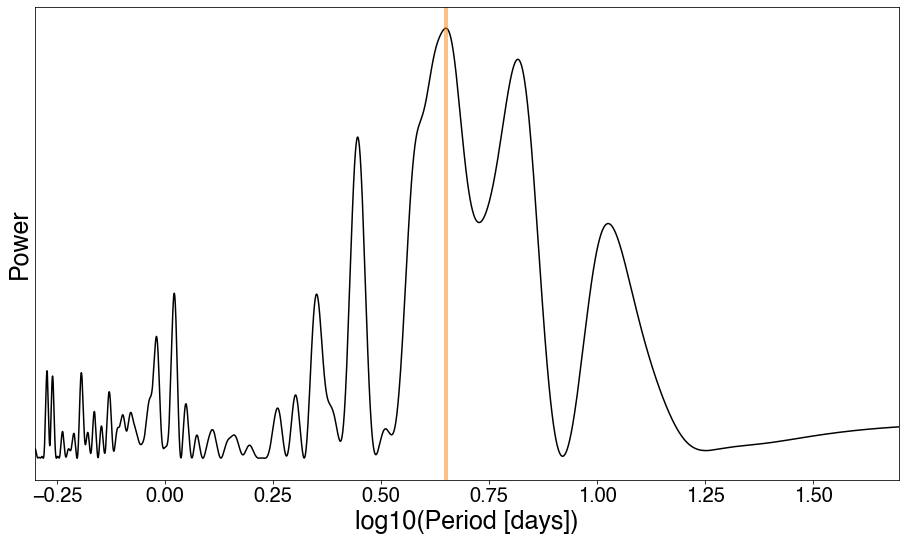

In [62]:
ls_period = rotate_el.ls_rotation()
print(ls_period)
rotate_el.ls_plot();

In [63]:
exo_0 = exoplanet.lomb_scargle_estimator(time, flux, yerr=flux_err, max_period= 10, max_peaks=2)

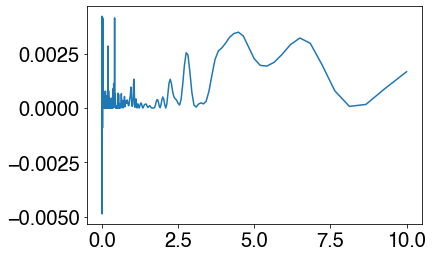

In [64]:
plt.plot(1/(exo_0['periodogram'][0]), exo_0['periodogram'][1])

In [81]:
period_grid_kep_mq1 = np.linspace(.1, 10, 1000)
pdm_period_kep_mq1, period_err_kep_mq1 = rotate_el.pdm_rotation(period_grid_kep_mq1, pdm_nbins=10)
print(pdm_period_kep_mq1, period_err_kep_mq1)

100%|██████████| 1000/1000 [00:01<00:00, 822.38it/s]


fitting to a limited range
8.305405405405406 3.352289801826356


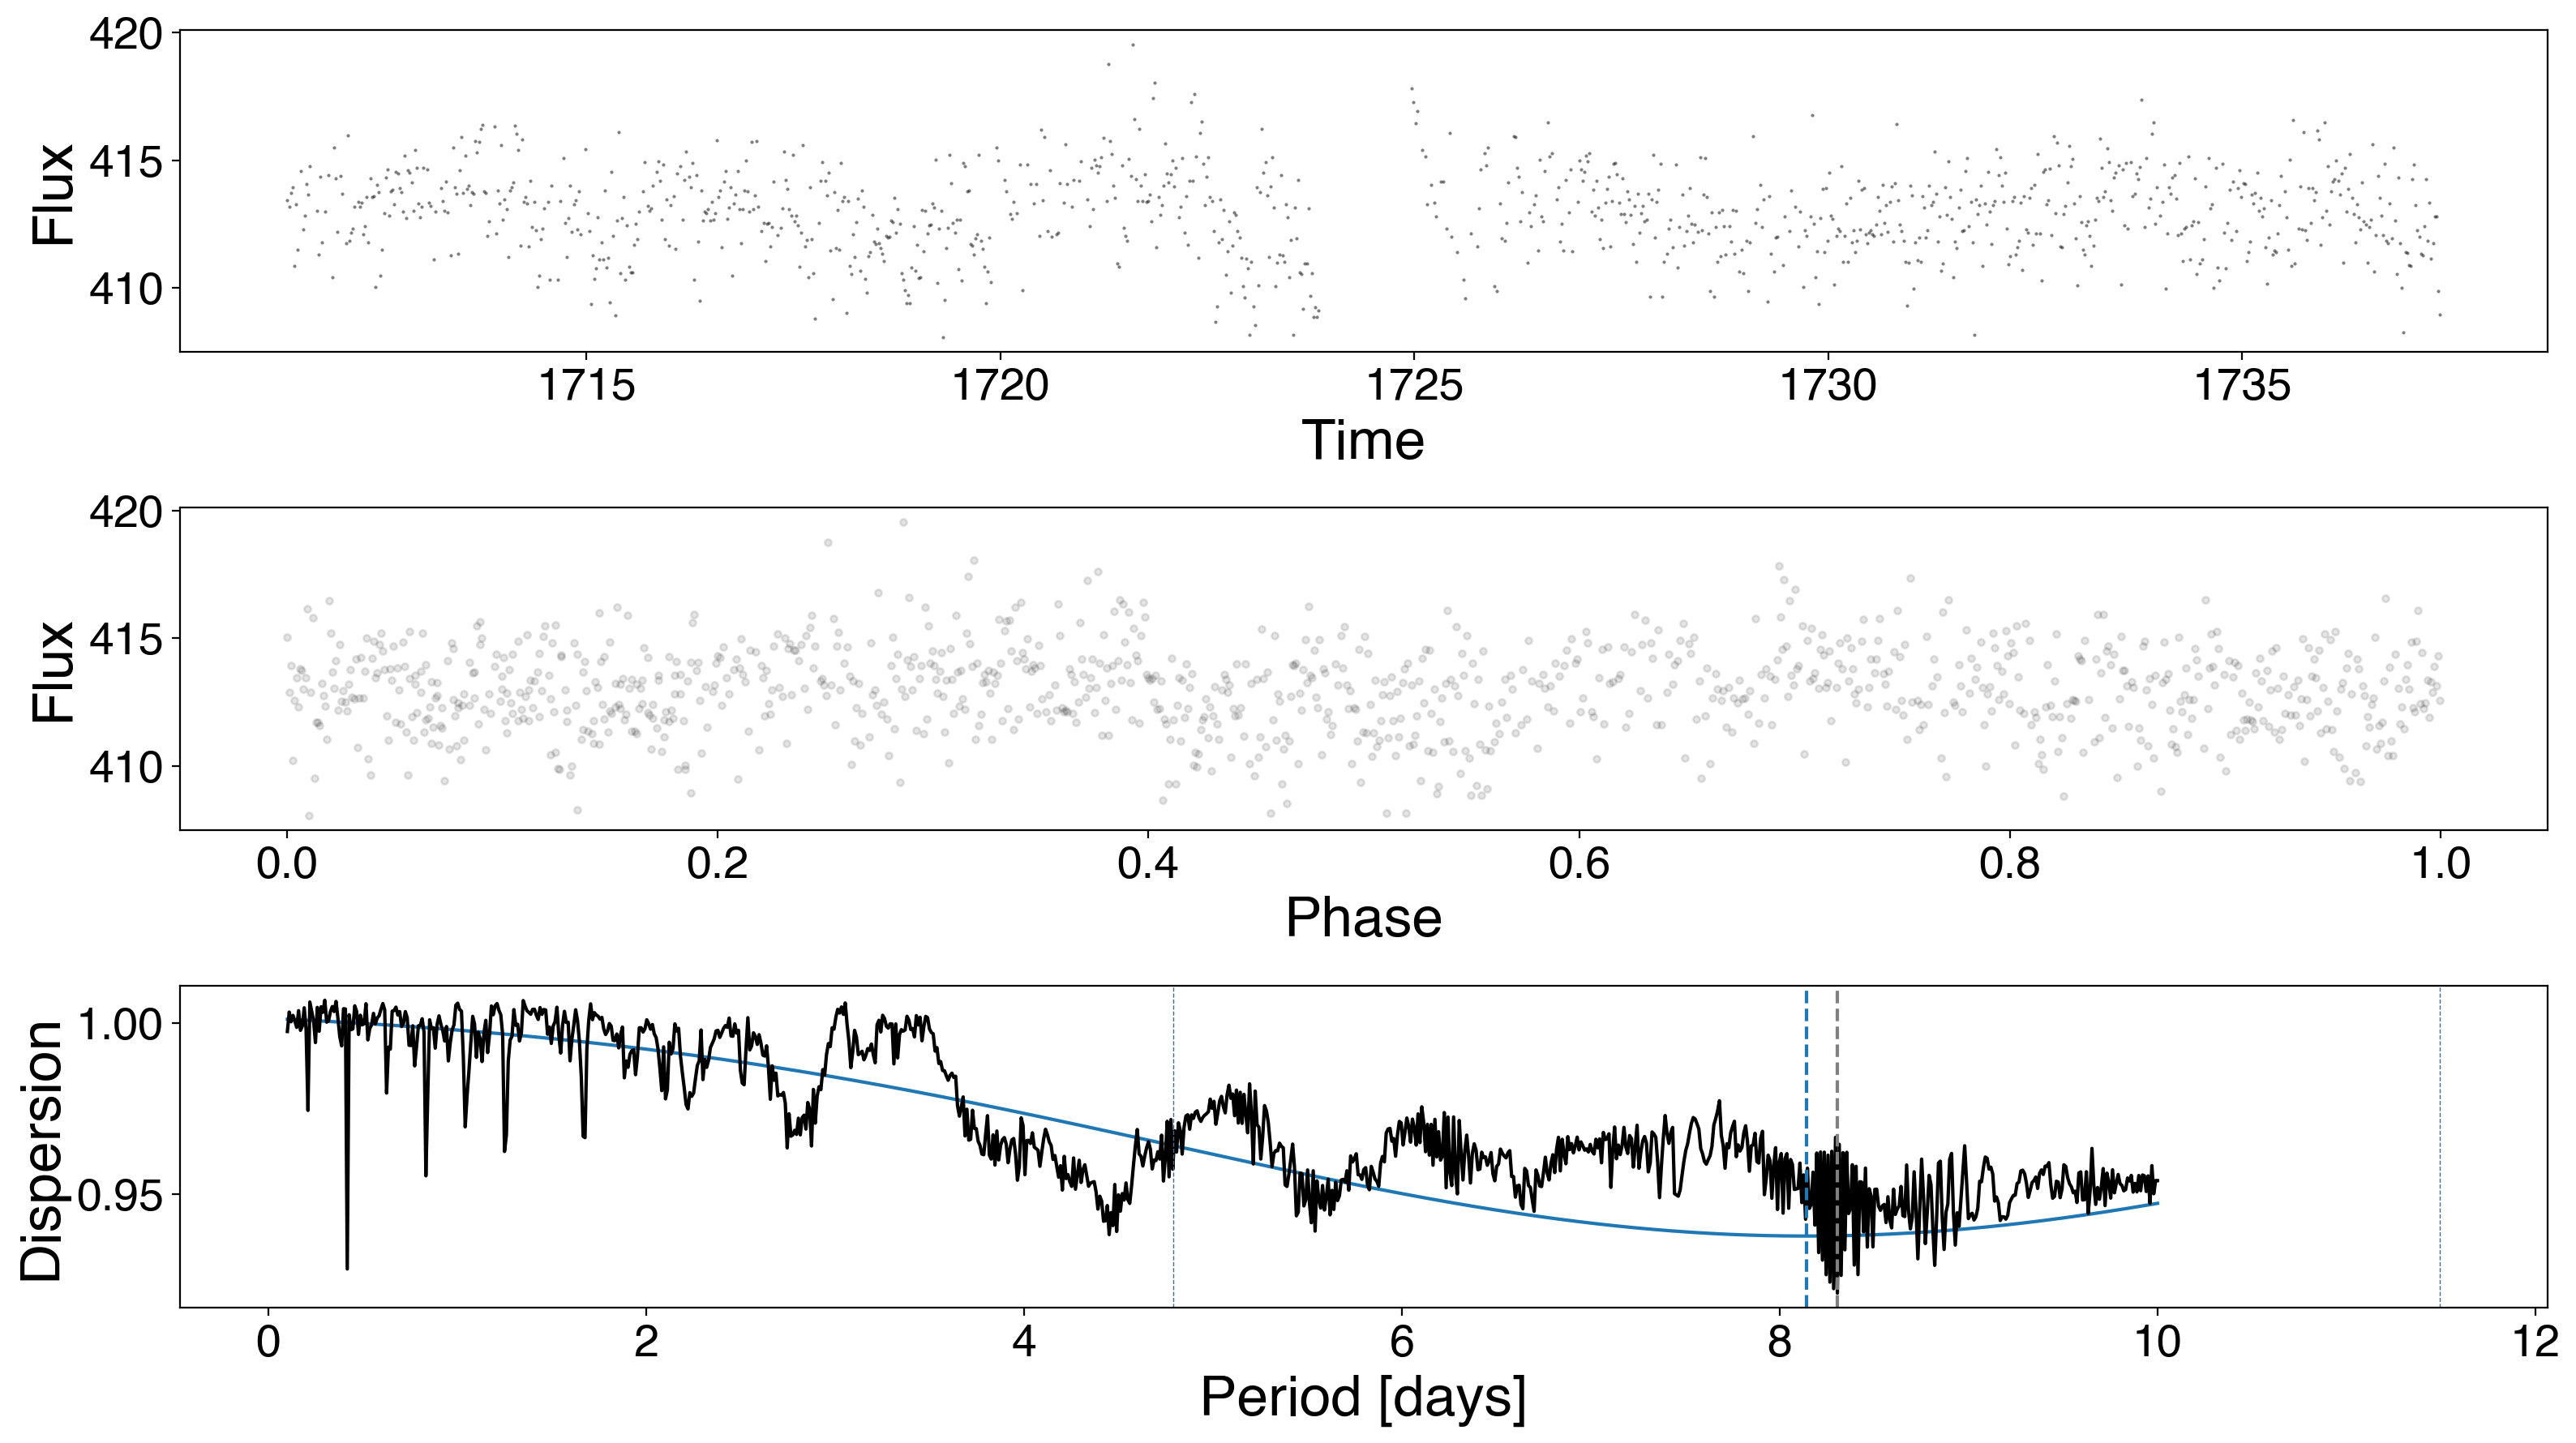

In [82]:
rotate_el.pdm_plot();

In [86]:
def eleanor_plots(coord):
    c = SkyCoord(coord, frame='icrs', unit='deg') #input star coordinates
    star = eleanor.Source(coords=c, sector = 15)
    data = eleanor.TargetData(star, do_psf=True, do_pca=True)
    
    #plot 
    plt.figure(figsize=(15,5))
    q = data.quality == 0
    
    plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, c = 'darkseagreen')
    plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, c = 'purple')
    plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), c = 'steelblue')
    plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, c= 'palevioletred')
    plt.ylabel('Normalized Flux')
    plt.xlabel('Time')
    plt.show()
    
    #defining data
    flux = data.pca_flux[q]
    time = data.time[q]
    flux_bar = np.average(flux)
    flux_err = flux * 0.01
    
    #auto correlation
    eleanor_ac = ac_mq_tess_el(c, 1000)
    plt.figure(figsize=(10,5))
    plt.scatter(eleanor_ac[1], eleanor_ac[0])
    plt.xlabel('tau', fontsize = 20)
    plt.ylabel('AC', fontsize = 20)
    plt.title('Autocorrelated Light Curve', fontsize = 25)
    plt.show()
    
    rotate_el = ss.RotationModel(time, flux, flux_err)
    ls_period = rotate_el.ls_rotation()
    print(ls_period)
    
    ls_plot = rotate_el.ls_plot();

    exo_0 = exoplanet.lomb_scargle_estimator(time, flux, yerr=flux_err, max_period= 10, max_peaks=2)
    plt.plot(1/(exo_0['periodogram'][0]), exo_0['periodogram'][1])
    plt.title('Periodigram')
    plt.show()

    period_grid = np.linspace(.1, 10, 1000)
    pdm_period, period_err = rotate_el.pdm_rotation(period_grid, pdm_nbins=10)
    print(pdm_period, period_err)

    pdm_plot = rotate_el.pdm_plot();
    
    return(ls_plot, pdm_plot, ls_period, pdm_period_kep_mq1)

No eleanor postcard has been made for your target (yet). Using TessCut instead.


100%|██████████| 1197/1197 [00:30<00:00, 39.84it/s]


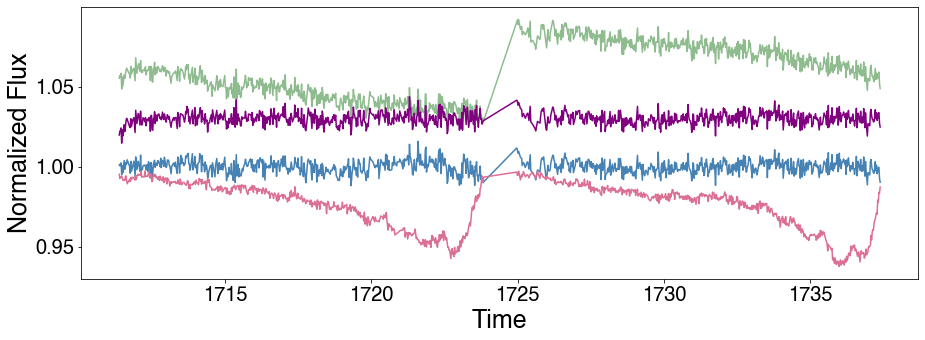

No eleanor postcard has been made for your target (yet). Using TessCut instead.


100%|██████████| 1197/1197 [00:29<00:00, 40.84it/s]


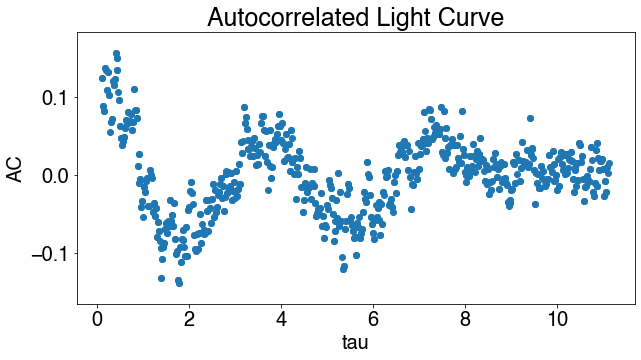

4.463862440239445


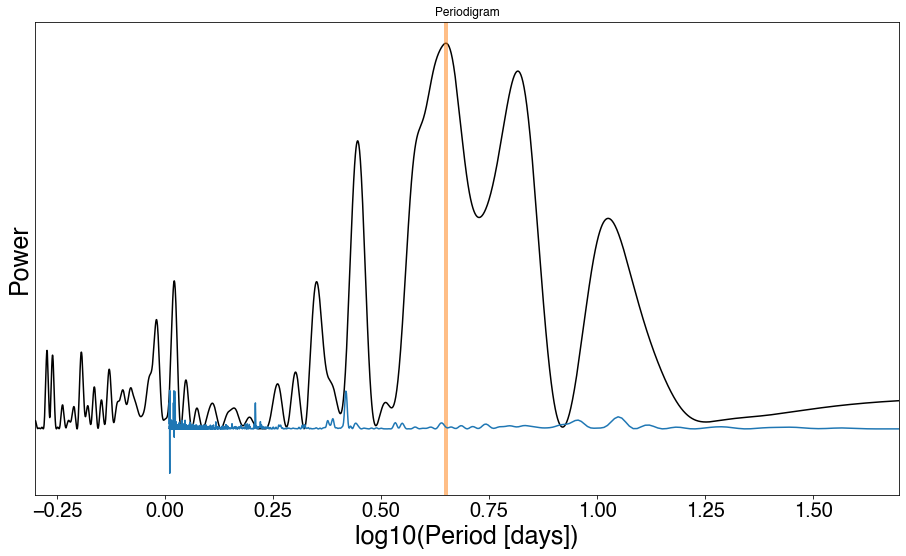

100%|██████████| 1000/1000 [00:00<00:00, 1091.61it/s]


fitting to a limited range
8.305405405405406 3.352289801826356


(<Figure size 1152x648 with 1 Axes>,
 <Figure size 3200x1800 with 3 Axes>,
 4.463862440239445,
 8.305405405405406)

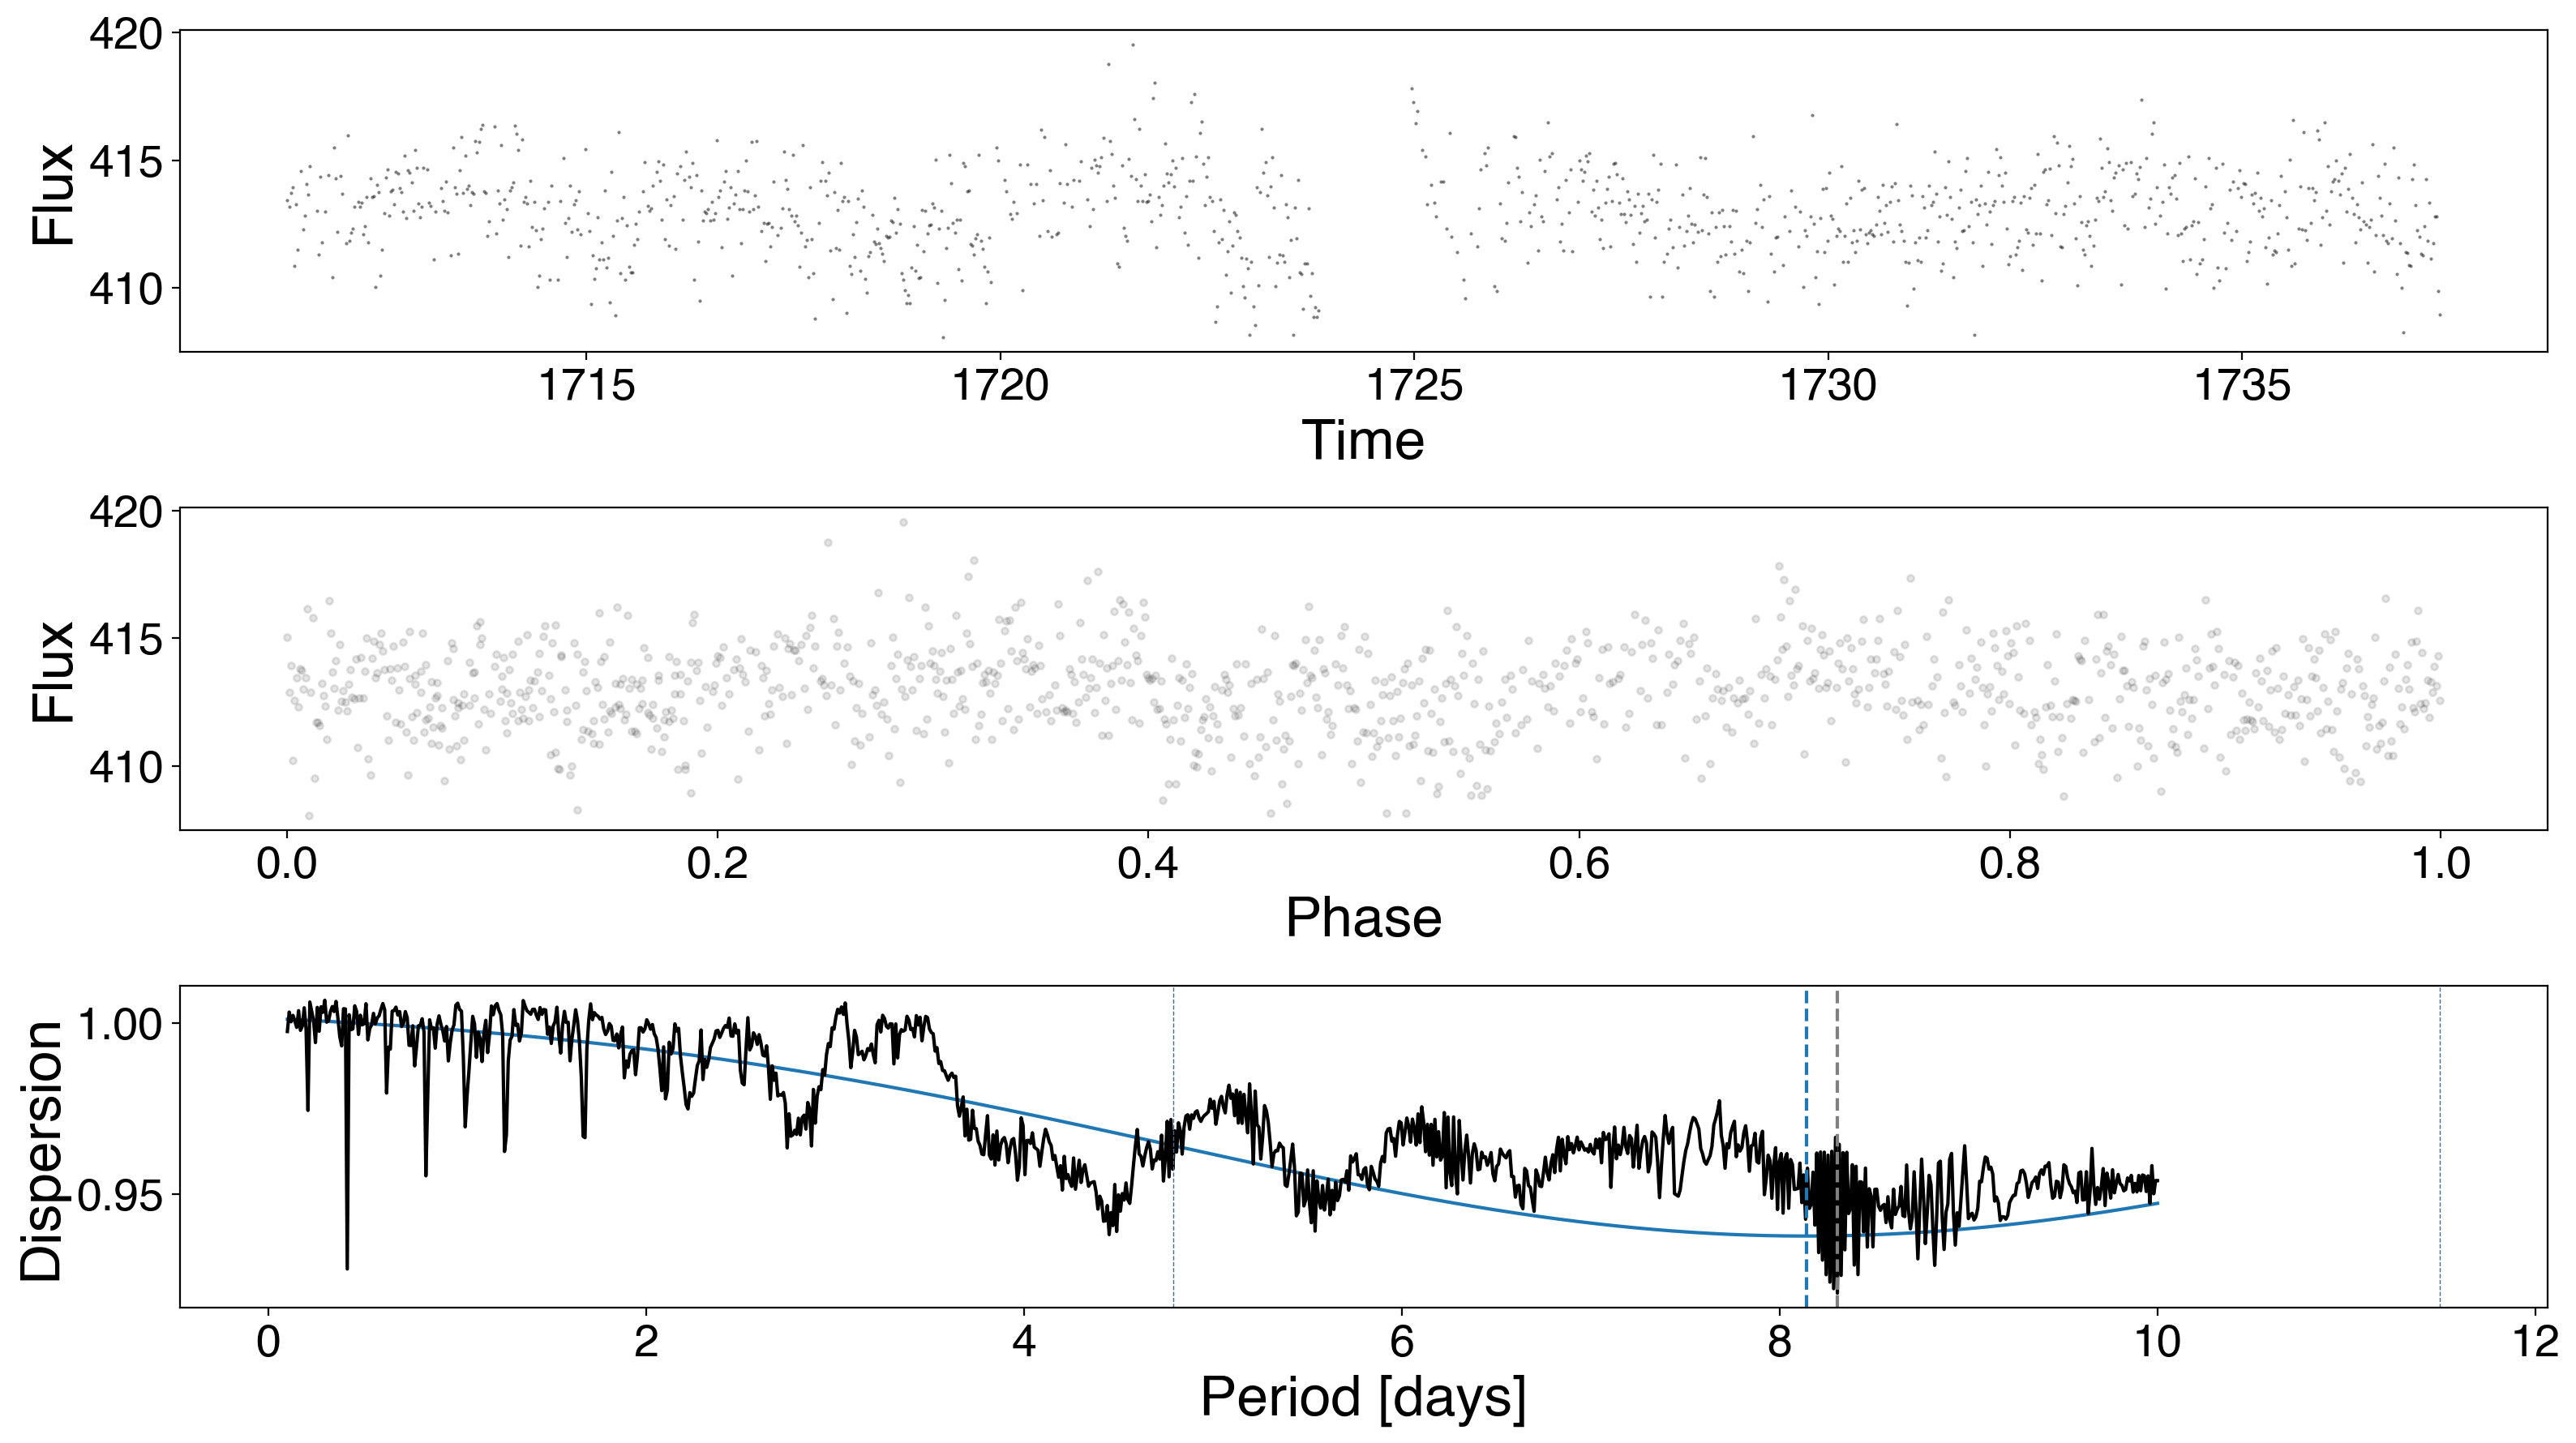

In [87]:
eleanor_plots('295.899 43.459')